<a href="https://colab.research.google.com/github/aryansinghal10/BCA/blob/main/Aryan_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all necessary libraries/packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle

# Part One: Loading and Cleaning the Data, Making Graphs

## Loading and Cleaning data

Link to csv file: https://drive.google.com/file/d/1uhEj5I1Ge_eX_pXsJQWJI0rDRvEijpOU/view?usp=sharing

Get csv file from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/housing.csv")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Cleaning the data and convert text columns to numeric columns


In [ ]:
df = pd.get_dummies(df, columns = ['ocean_proximity'])
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace = True)
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

## Plotting the Data - Data Analytics

### Histograms

For the age of houses, we can see that they mostly lie between 15 - 35 years.

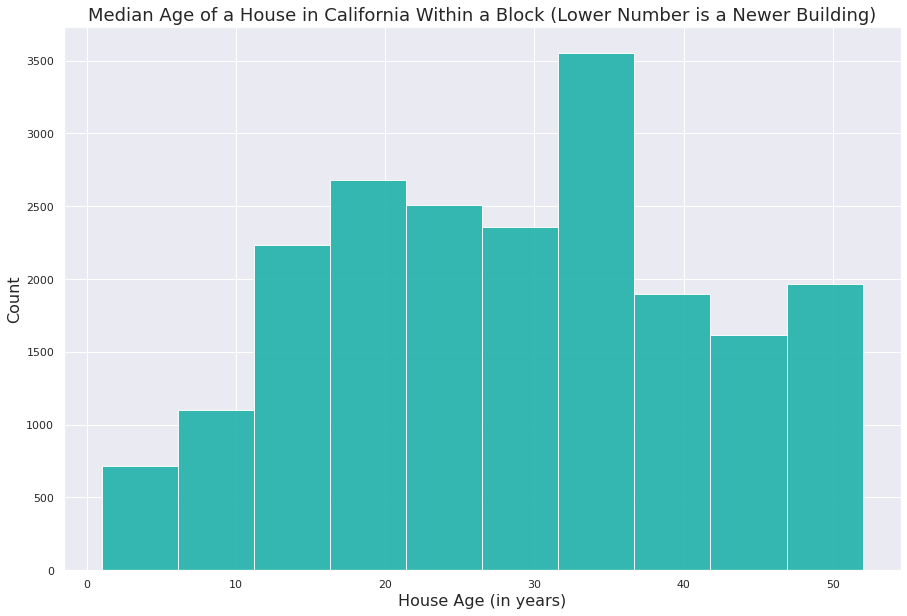

In [ ]:
# Median age of house (in years)
sns.set()

# Change size
plt.figure(figsize=(15, 10))

# Show histogram of housing_median_age column
plt.hist(df['housing_median_age'], color = 'lightseagreen', alpha = 0.9)

plt.xlabel('House Age (in years)', size = 16)
plt.ylabel('Count', size = 16)
title = 'Median Age of a House in California Within a Block (Lower Number is a Newer Building)'
plt.title(title, size = 18)
plt.savefig(title, dpi = 200)

plt.show()

We can see that a population of 3 - 2133 residing in a housing block is most common.

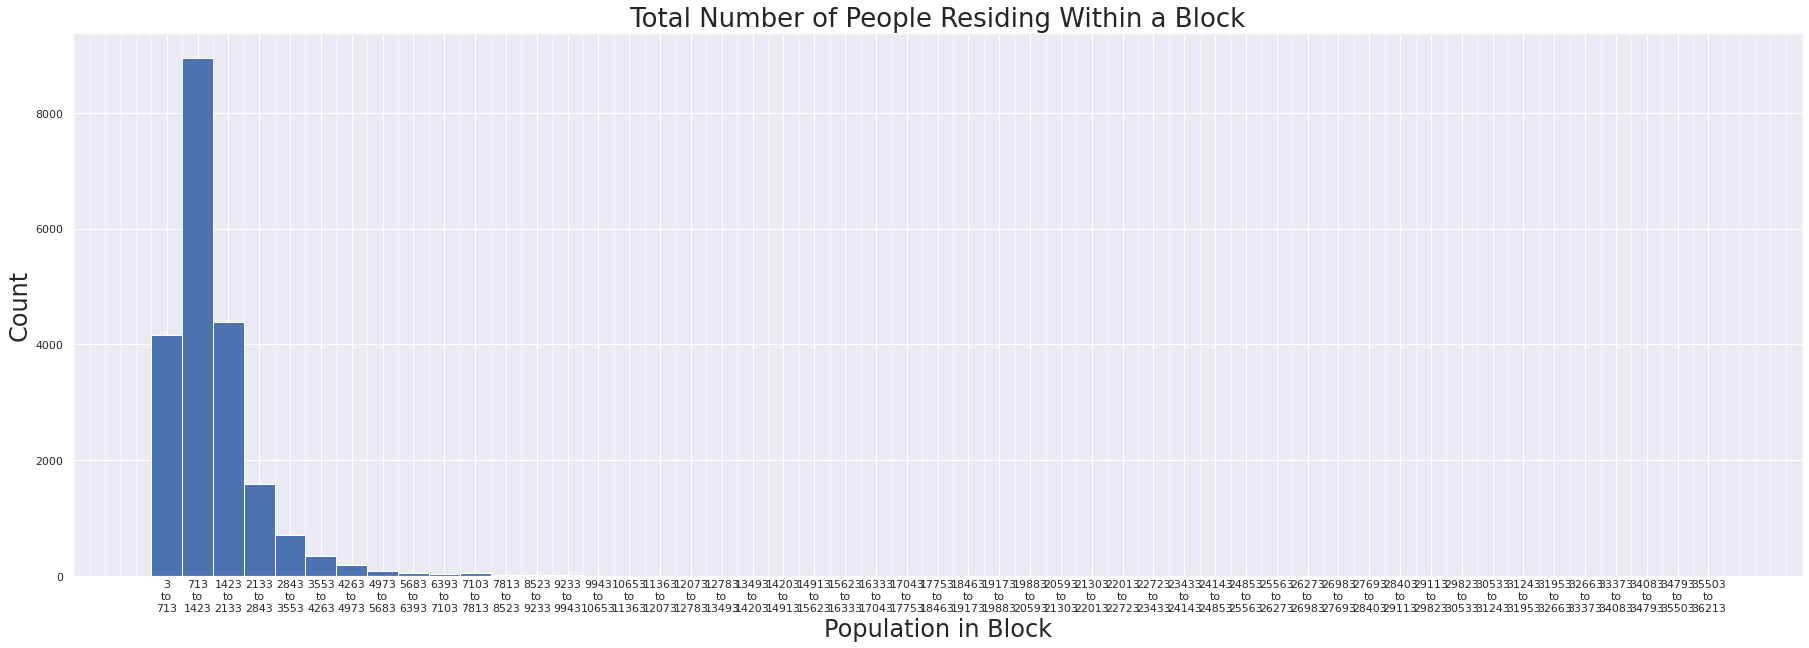

In [ ]:
# Population residing in a housing block
# The code to this histogram was shared by one of the cohort leaders.

from matplotlib.ticker import AutoMinorLocator

w = int(df['population'].quantile(0.2)) #bin width | if we increased the quantile value, number of columns would decrease, columns would become wider, and variability would decrease

#using x-axis labels for each column in the histogram (note that values are rounded to integer in order to conserve space and render readable)
fig, ax = plt.subplots(1, figsize=(31,10))
a, bins, b = plt.hist(df['population'], bins=np.arange(min(df['population']), max(df['population']) + w, w)) #replace df.Age with df.name of column

# Draw the centering grid
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)

#center the labels
xticks = [int((bins[idx+1] + value)/2) for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:d}\nto\n{:d}".format(int(value), int(bins[idx+1])) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove all the extra ticks
ax.tick_params(axis='x', which='both', length=0)

plt.xlabel('Population in Block', size = 24)
plt.ylabel('Count', size = 24)
title = 'Total Number of People Residing Within a Block'
plt.title(title, size = 26)
plt.savefig(title, dpi = 200)

We can see that the median house value for households is most common between 50,000 - 200,000 US Dollars

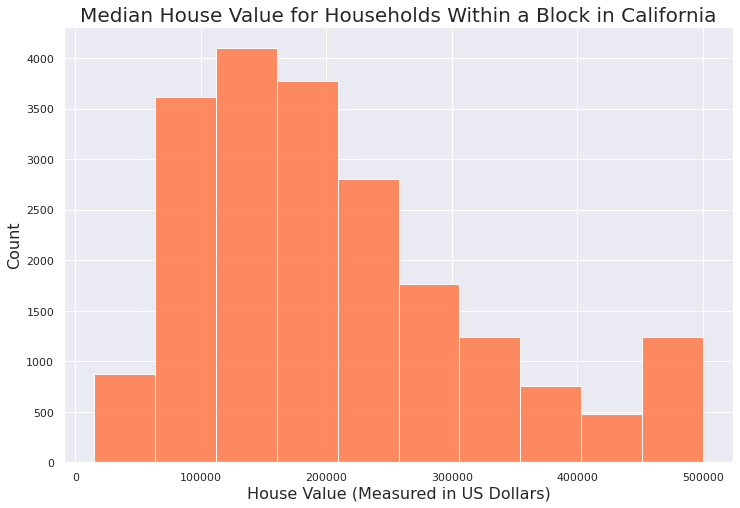

In [ ]:
sns.set()

# change size
plt.figure(figsize=(12, 8))

# show histogram of median_house_value column
plt.hist(df['median_house_value'], color = 'coral', alpha = 0.9)
plt.xlabel('House Value (Measured in US Dollars)', size=16)
plt.ylabel('Count', size = 16)
title = 'Median House Value for Households Within a Block in California'
plt.title(title, size = 20)
plt.savefig(title, dpi = 200)

plt.show()

### Scatter Plots

In [ ]:
# Find correlation between data columns 
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.018220,-0.006433,-0.004361,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018220,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [ ]:
df.corr().loc['median_house_value']

longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049454
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND        0.023416
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
Name: median_house_value, dtype: float64

Plot the longitude and latitude

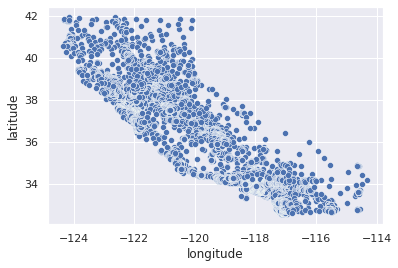

In [ ]:
sns.scatterplot(data = df, x = 'longitude', y = 'latitude')

Observer Relationship Between Location and Median House Value

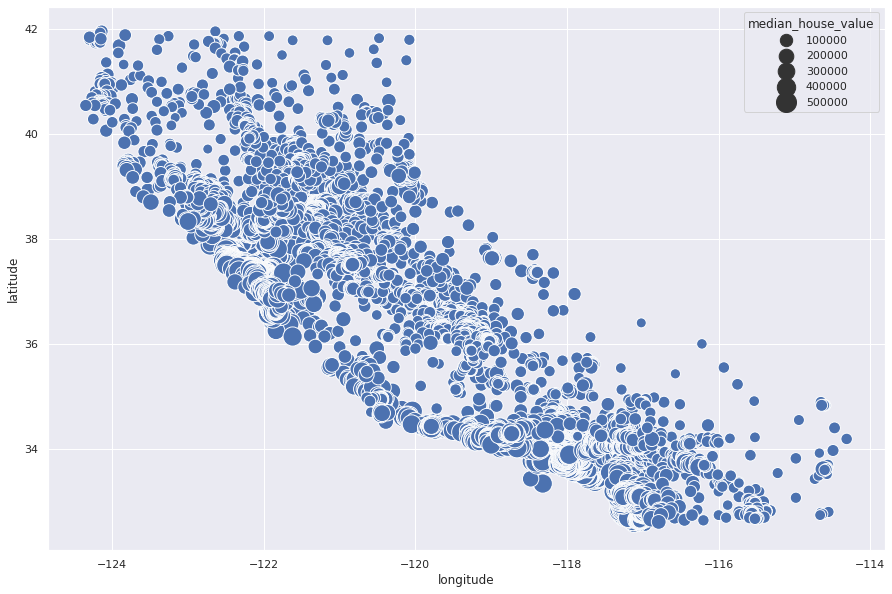

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(x=df['longitude'], y=df['latitude'],
                size=df['median_house_value'],
                sizes=(100, 400),
                palette='Blues_r')
title = 'Observing Relationship Between Location and Median House Value'
plt.title=(title)
plt.savefig(title, dpi = 200)
plt.show()

Median Income Relation to Median House Value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


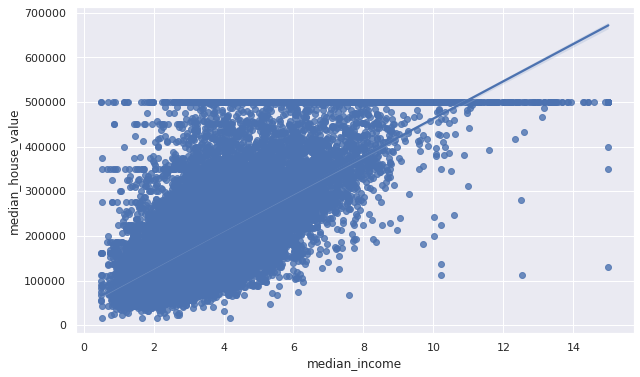

In [ ]:
plt.figure(figsize = (10, 6))
sns.regplot(df['median_income'], df['median_house_value'])
title = 'Median Income Relation to Median House Value'
plt.title=(title)
plt.savefig(title, dpi = 200)
plt.show()

# Part Two: Machine Learning

Getting data ready for ML

Split data into X and y

In [ ]:
# Convert text column to numerical columns
df.rename(columns = {'ocean_proximity_<1H OCEAN': 'ocean_train proximity_less_than_1H OCEAN'}, inplace = True)

# For Regression
X = df.loc[:, df.columns!='median_house_value']
y = df.iloc[:, 8]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_train proximity_less_than_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

Test function to figure out which method fit best without splitting data into test and train set.

Found a lot of overfits. This is why we need to split the data

In [ ]:
def ml_model_test(model):
  model.fit(X, y)
  return model.score(X, y)

In [ ]:
ml_model_test(LinearRegression())

0.6454747751244776

In [ ]:
ml_model_test(DecisionTreeRegressor())

1.0

In [ ]:
ml_model_test(RandomForestRegressor())

0.9760045845471681

In [ ]:
ml_model_test(XGBRegressor())

[16:44:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.7843834643503547

Split data into test and train set.

Create a method to score models and test the model in various methods.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
def ml_model(model):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_train proximity_less_than_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13186,-117.69,34.09,28.0,1437.0,295.0,724.0,262.0,2.7250,0,1,0,0,0
13776,-117.08,34.03,23.0,3862.0,699.0,2082.0,652.0,3.1540,0,1,0,0,0
17307,-119.57,34.38,22.0,2512.0,426.0,919.0,341.0,5.7590,1,0,0,0,0
3323,-122.92,38.97,20.0,2067.0,384.0,904.0,333.0,2.9934,1,0,0,0,0
5412,-118.44,34.01,41.0,1309.0,221.0,534.0,228.0,5.1708,1,0,0,0,0


In [ ]:
y_train.head()

13186    140200.0
13776    115700.0
17307    425000.0
3323     134200.0
5412     418800.0
Name: median_house_value, dtype: float64

## Creating and Testing Our Models

Now we will create and test multiple different models.

In [ ]:
ml_model(LinearRegression())

0.648476508076155

In [ ]:
ml_model(DecisionTreeRegressor())

0.6468096871040042

In [ ]:
ml_model(RandomForestRegressor())

0.8167178653520331

In [ ]:
ml_model(RandomForestRegressor(n_estimators = 500,
                               max_features = 5,
                               max_depth = 20,
                               bootstrap = False))

0.8257089505035327

Best ML model for my dataset

In [ ]:
ml_model(XGBRegressor(max_depth=11, 
                      n_estimators=400,
                      subsample=0.7,
                      colsample_bytree=0.8,
                      objective='reg:squarederror'))

0.8400433623140118

## Finalizing the Model

In [ ]:
#arr (type = Dataframe) - A dataframe with > 1 rows and columns
#train (type = int, float) - Size of training dataset. If int, then specifies the integer length of the new dataset. If float, then specifies the fraction of arr to be returned.
#test (type = int, float) - Size of testing dataset. If int, then specifies the integer length of the new dataset. If float, then specifies the fraction of arr to be returned.
#predict (type = int, float) - Size of predicting dataset. If int, then specifies the integer length of the new dataset. If float, then specifies the fraction of arr to be returned.
#Note - type of train, test, predict must all be same. Ex. They all should be ints, or they all should be floats.

def df_split(arr, train, test, predict):
  try:
    arr_train = arr.sample(n=train)
    arr.drop(index=arr_train.index.tolist(), inplace = True)
    arr_test = arr.sample(n=test)
    arr.drop(index=arr_test.index.tolist(), inplace = True)
    arr_predict = arr
  except:
    num = len(arr)
    train1, test1, predict1 = int(num * train), int(num * test), int(num*predict)
    arr_train, arr_test, arr_predict = df_split(arr, train1, test1, predict1)
  finally:
    return arr_train, arr_test, arr_predict

In [ ]:
df_new, df_new_test, df_new_predict = df_split(df, 0, df.shape[0]-3, 3)
df_new_test.reset_index(inplace=True)
df_new.reset_index(inplace=True)
df_new_predict.reset_index(inplace=True)

In [ ]:
# The code for this should be basically the same as where you make X and y normally
X_predicted = df_new_predict.loc[:, df.columns!='median_house_value']
y_predicted = df_new_predict.iloc[:, 8]

In [ ]:
#Collect your predictions and adjust X and y, and then turn them into arrays.
import numpy as np
# X = X.iloc[:-1, :]
# X_pred_row = X.iloc[-1, :]
# y = np.array(y)
# y = y[:-1]
# y_pred_val = y[-1]
X_predicted = np.array(X_predicted)
y_predicted = np.array(y_predicted)


# Train the best model on ALL the data.
# This lets our model be more accurate.
final_model = XGBRegressor(objective='reg:squarederror',
                     max_depth=2,
                     n_estimators=200,
                     learning_rate=0.1,
                     )
final_model.fit(X_predicted, y_predicted)

XGBRegressor(max_depth=2, n_estimators=200, objective='reg:squarederror')

Using pickle to save and load model

In [ ]:
import pickle

# store ml model to computer
with open('final_model.pkl', 'wb') as f:
  pickle.dump(final_model, f)

# load ml model from computer
with open('final_model.pkl', 'rb') as f:
  final_model = pickle.load(f)

In [ ]:
# Make sure to make a prediction with your final model too.
new_row = X_predicted
new_row = np.array(new_row)
# This prints shows us the predicted y values compared to the real y values
final_model.predict(new_row), np.array([y_predicted])

(array([1.6567937, 3.4885373, 2.1180363], dtype=float32),
 array([[1.6559, 3.4896, 2.1179]]))

Values are very close proving my model is accurate.

# Additional: Deep Learning

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# For a Regression Data Set
num_cols = X.shape[1]
model_n = Sequential()
model_n.add(Dense(20, input_shape = (num_cols,), activation = 'relu'))
model_n.add(Dense(6, activation = 'relu'))
model_n.add(Dense(3, activation = 'relu'))
model_n.add(Dense(1, activation = 'relu'))
# model_n.add(Dense(1, input_shape = (num_cols,), activation = 'sigmoid')) # Use this line for Classification Data Set
print(model_n.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                280       
                                                                 
 dense_13 (Dense)            (None, 6)                 126       
                                                                 
 dense_14 (Dense)            (None, 3)                 21        
                                                                 
 dense_15 (Dense)            (None, 1)                 4         
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compiling and Evaluating the Model
model_n.compile(optimizer = 'adam',
                loss = 'mse')
                #metrics = ['accuracy'])
model_n.fit(X_train, y_train, epochs = 20, validation_split = 0.2)
model_n.evaluate(X_test, y_test)

Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 10225144832.0000 - val_loss: 10711789568.0000
Epoch 2/20
387/387 [==============================] - 1s 2ms/step - loss: 10153830400.0000 - val_loss: 10597245952.0000
Epoch 3/20
387/387 [==============================] - 1s 2ms/step - loss: 10052278272.0000 - val_loss: 10520012800.0000
Epoch 4/20
387/387 [==============================] - 1s 2ms/step - loss: 9975026688.0000 - val_loss: 10433894400.0000
Epoch 5/20
387/387 [==============================] - 1s 2ms/step - loss: 9886940160.0000 - val_loss: 10344256512.0000
Epoch 6/20
387/387 [==============================] - 1s 2ms/step - loss: 9804222464.0000 - val_loss: 10253910016.0000
Epoch 7/20
387/387 [==============================] - 1s 2ms/step - loss: 9713400832.0000 - val_loss: 10193021952.0000
Epoch 8/20
387/387 [==============================] - 1s 2ms/step - loss: 9623891968.0000 - val_loss: 10089382912.0000
Epoch 9/20
387/387 [=========================

8984396800.0